## Part 1: Data Loading and Basic Exploration

In [15]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string

# Manipulation de dates
from datetime import datetime, timedelta

import sys

from IPython.display import display, HTML

# Pour ignorer les avertissements
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
%matplotlib inline
pd.set_option('display.max_columns', None)

In [16]:
# Définition du chemin vers le fichier CSV
DATA_PATH = "/kaggle/input/CORD-19-research-challenge/metadata.csv"

try:
    # --- Chargement du fichier ---
    df = pd.read_csv(DATA_PATH)

    # --- Aperçu des données ---
    print("🔹 Aperçu des premières lignes :")
    display(df.head())

    # --- Informations générales ---
    print("\n📊 Informations sur le DataFrame :")
    df.info()

    # --- Statistiques descriptives ---
    print("\n📈 Statistiques descriptives :")
    display(df.describe())

except FileNotFoundError as e:
    print("❌ Fichier introuvable :", e)
    sys.exit()

🔹 Aperçu des premières lignes :


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN



📊 Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files

,mag_id,s2_id
count,0.0,9.764680e+05
mean,NaN,2.175871e+08
std,NaN,5.312281e+07
min,NaN,9.600000e+01
25%,NaN,2.211411e+08
50%,NaN,2.320829e+08
75%,NaN,2.373948e+08
max,NaN,2.491936e+08


## Part 2: Data Cleaning and Preprocessing

In [17]:
# 1. Calcul des pourcentages de null
missing_percentage = df.isnull().mean() * 100
# Affichage trié du plus grand au plus petit
print(missing_percentage.sort_values(ascending=False))

mag_id              100.000000
arxiv_id             98.651506
pmc_json_files       70.118865
pdf_json_files       64.627600
sha                  64.627600
pmcid                63.131849
who_covidence_id     54.296084
pubmed_id            52.782163
doi                  37.843772
url                  34.990063
abstract             22.291371
journal               8.263964
s2_id                 7.589196
authors               2.258910
publish_time          0.171673
title                 0.047603
license               0.000000
source_x              0.000000
cord_uid              0.000000
dtype: float64


In [18]:
# 2. Identification des colonnes trop vides
cols_empty = missing_percentage[missing_percentage > 40].index
print(f"Colonnes trop vides supprimées : {list(cols_empty)}")

# 3. Suppression
df_cleaned = df.drop(columns=cols_empty)


print("\n Suppression des identifiants inutiles ---")
# Liste des colonnes ID restantes qui ne servent pas à l'analyse
# On inclut 'url' car c'est un identifiant unique qui n'est pas analysable tel quel
ids_to_remove = ['cord_uid', 's2_id', 'doi', 'url']

# On ne supprime que celles qui existent encore dans le dataframe
cols_ids = [c for c in ids_to_remove if c in df_cleaned.columns]
df_cleaned = df_cleaned.drop(columns=cols_ids)

print(f"Identifiants supprimés : {cols_ids}")
print(f"\nColonnes restantes pour l'analyse : {df_cleaned.columns.tolist()}")


print("\n Préparation des dates ---")
# Conversion et extraction de l'année
df_cleaned['publish_time'] = pd.to_datetime(df_cleaned['publish_time'], errors='coerce')
df_cleaned['year'] = df_cleaned['publish_time'].dt.year

# Nettoyage final : suppression des lignes où l'année ou le titre sont vides (essentiels pour les graphs)
df_cleaned = df_cleaned.dropna(subset=['year', 'title'])

Colonnes trop vides supprimées : ['sha', 'pmcid', 'pubmed_id', 'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files']

 Suppression des identifiants inutiles ---
Identifiants supprimés : ['cord_uid', 's2_id', 'doi', 'url']

Colonnes restantes pour l'analyse : ['source_x', 'title', 'license', 'abstract', 'publish_time', 'authors', 'journal']

 Préparation des dates ---


In [19]:
#Recenssement des doublons
df.duplicated().sum()

0

In [20]:
# 1. Remplir les Résumés manquants
# On met un texte générique pour que le code d'analyse de texte ne plante pas
df_cleaned['abstract'] = df_cleaned['abstract'].fillna('No Abstract Available')

# 2. Remplir les Auteurs et Journaux manquants
df_cleaned['authors'] = df_cleaned['authors'].fillna('Unknown')
df_cleaned['journal'] = df_cleaned['journal'].fillna('Unknown')

# --- VÉRIFICATION FINALE ---
print("Valeurs nulles restantes après remplissage :")
print(df_cleaned.isnull().sum())

df_cleaned.to_csv("metadata_cleanned.csv", index=False, encoding="utf-8")


Valeurs nulles restantes après remplissage :
source_x        0
title           0
license         0
abstract        0
publish_time    0
authors         0
journal         0
year            0
dtype: int64


## Partie 3 : Data analysis and visualization



In [21]:
import re
from collections import Counter

# 1. Compter les articles par année de publication
df_cleaned['publish_time'] = pd.to_datetime(df_cleaned['publish_time'], errors='coerce')
df_cleaned['year'] = df_cleaned['publish_time'].dt.year
articles_per_year = df_cleaned['year'].value_counts().sort_index()
print("Nombre d'articles par année :")
print(articles_per_year)

# 2. Identifier les principales revues publiant des recherches sur la COVID-19
top_journals = df_cleaned['journal'].value_counts().head(10)
print("\nTop 10 revues principales :")
print(top_journals)

# 3. Trouver les mots les plus fréquents dans les titres (fréquence simple)
titles = df_cleaned['title'].dropna().str.lower()
all_words = []
for title in titles:
    # Extraire les mots en utilisant une regex simple
    words = re.findall(r'\b\w+\b', title)
    all_words.extend(words)
word_counts = Counter(all_words)
most_common = word_counts.most_common(20)
print("\nLes 20 mots les plus fréquents dans les titres :")
for word, count in most_common:
    print(f"{word}: {count}")

Nombre d'articles par année :
year
1856         3
1857         1
1860         2
1864         1
1876         1
         ...  
2020    164537
2021    219335
2022     85265
2023         1
2024         1
Name: count, Length: 75, dtype: int64

Top 10 revues principales :
journal
Unknown                            37185
bioRxiv                             8874
Int J Environ Res Public Health     8200
PLoS One                            7154
Sci Rep                             4160
Reactions Weekly                    3698
Front Psychol                       3265
BMJ                                 3003
Cureus                              2959
Front Immunol                       2674
Name: count, dtype: int64

Les 20 mots les plus fréquents dans les titres :
of: 355074
and: 272453
in: 260963
the: 256769
covid: 199862
19: 195995
a: 176709
for: 103770
to: 82770
with: 82495
on: 60910
2: 58403
pandemic: 54916
sars: 53136
cov: 50626
during: 47854
patients: 46426
study: 40330
from: 36464
health: 339

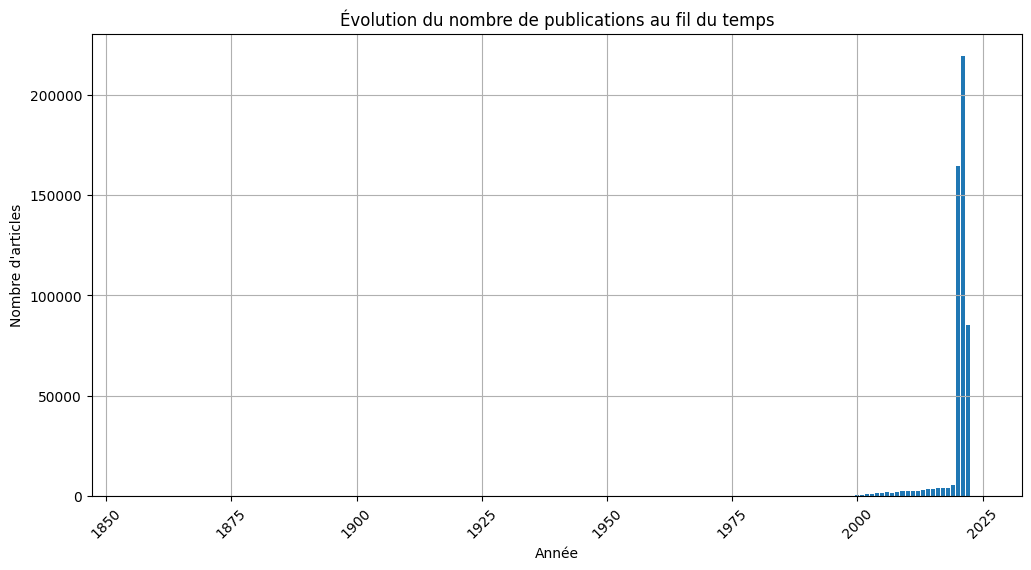

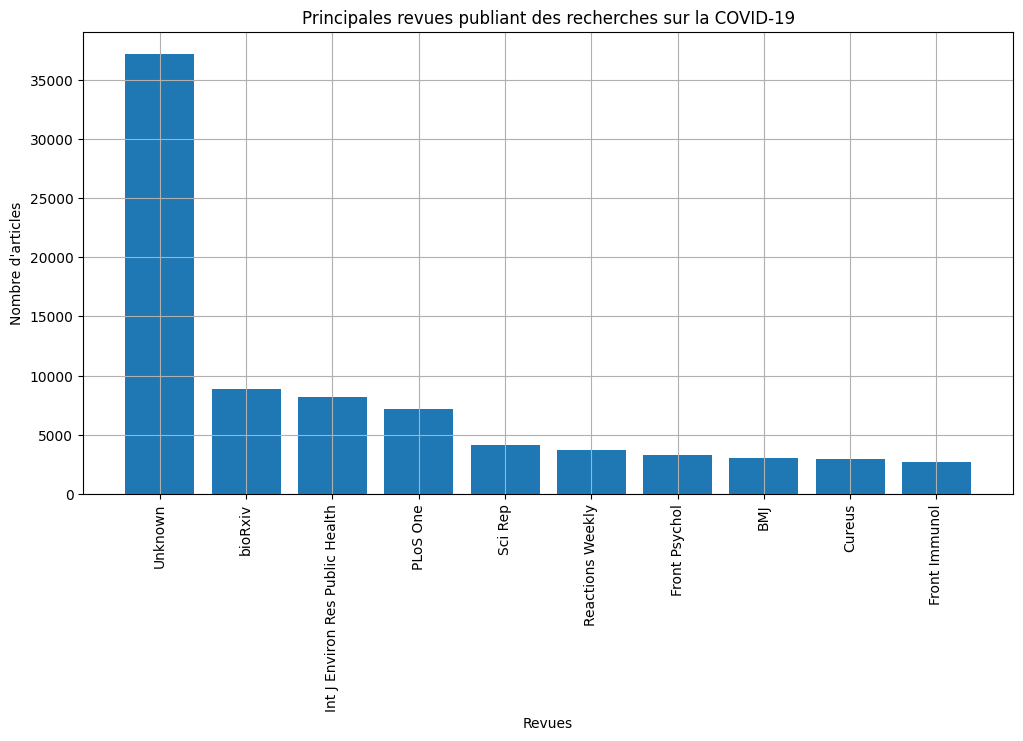

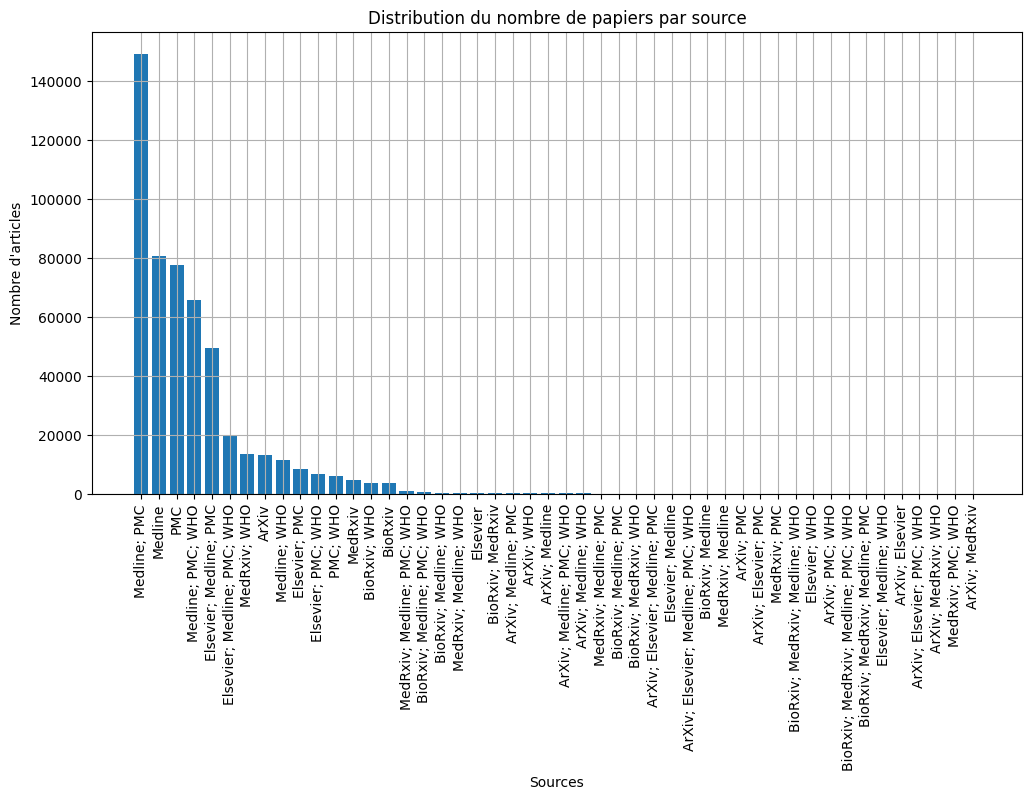

In [22]:
# Graphique pour l'évolution (utilisant un graphique en barres)
plt.figure(figsize=(12, 6))
plt.bar(articles_per_year.index, articles_per_year.values)
plt.title("Évolution du nombre de publications au fil du temps")
plt.xlabel("Année")
plt.ylabel("Nombre d'articles")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 1. Créez un graphique à barres des principales revues de publication
top_journals = df_cleaned['journal'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_journals.index, top_journals.values)
plt.title("Principales revues publiant des recherches sur la COVID-19")
plt.xlabel("Revues")
plt.ylabel("Nombre d'articles")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# 2. Représenter graphiquement la distribution du nombre de papiers par source
# Assuming 'source' refers to 'source_x' in the metadata
sources = df_cleaned['source_x'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(sources.index, sources.values)
plt.title("Distribution du nombre de papiers par source")
plt.xlabel("Sources")
plt.ylabel("Nombre d'articles")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


Image sauvegardée sous : wordcloud_titles.png


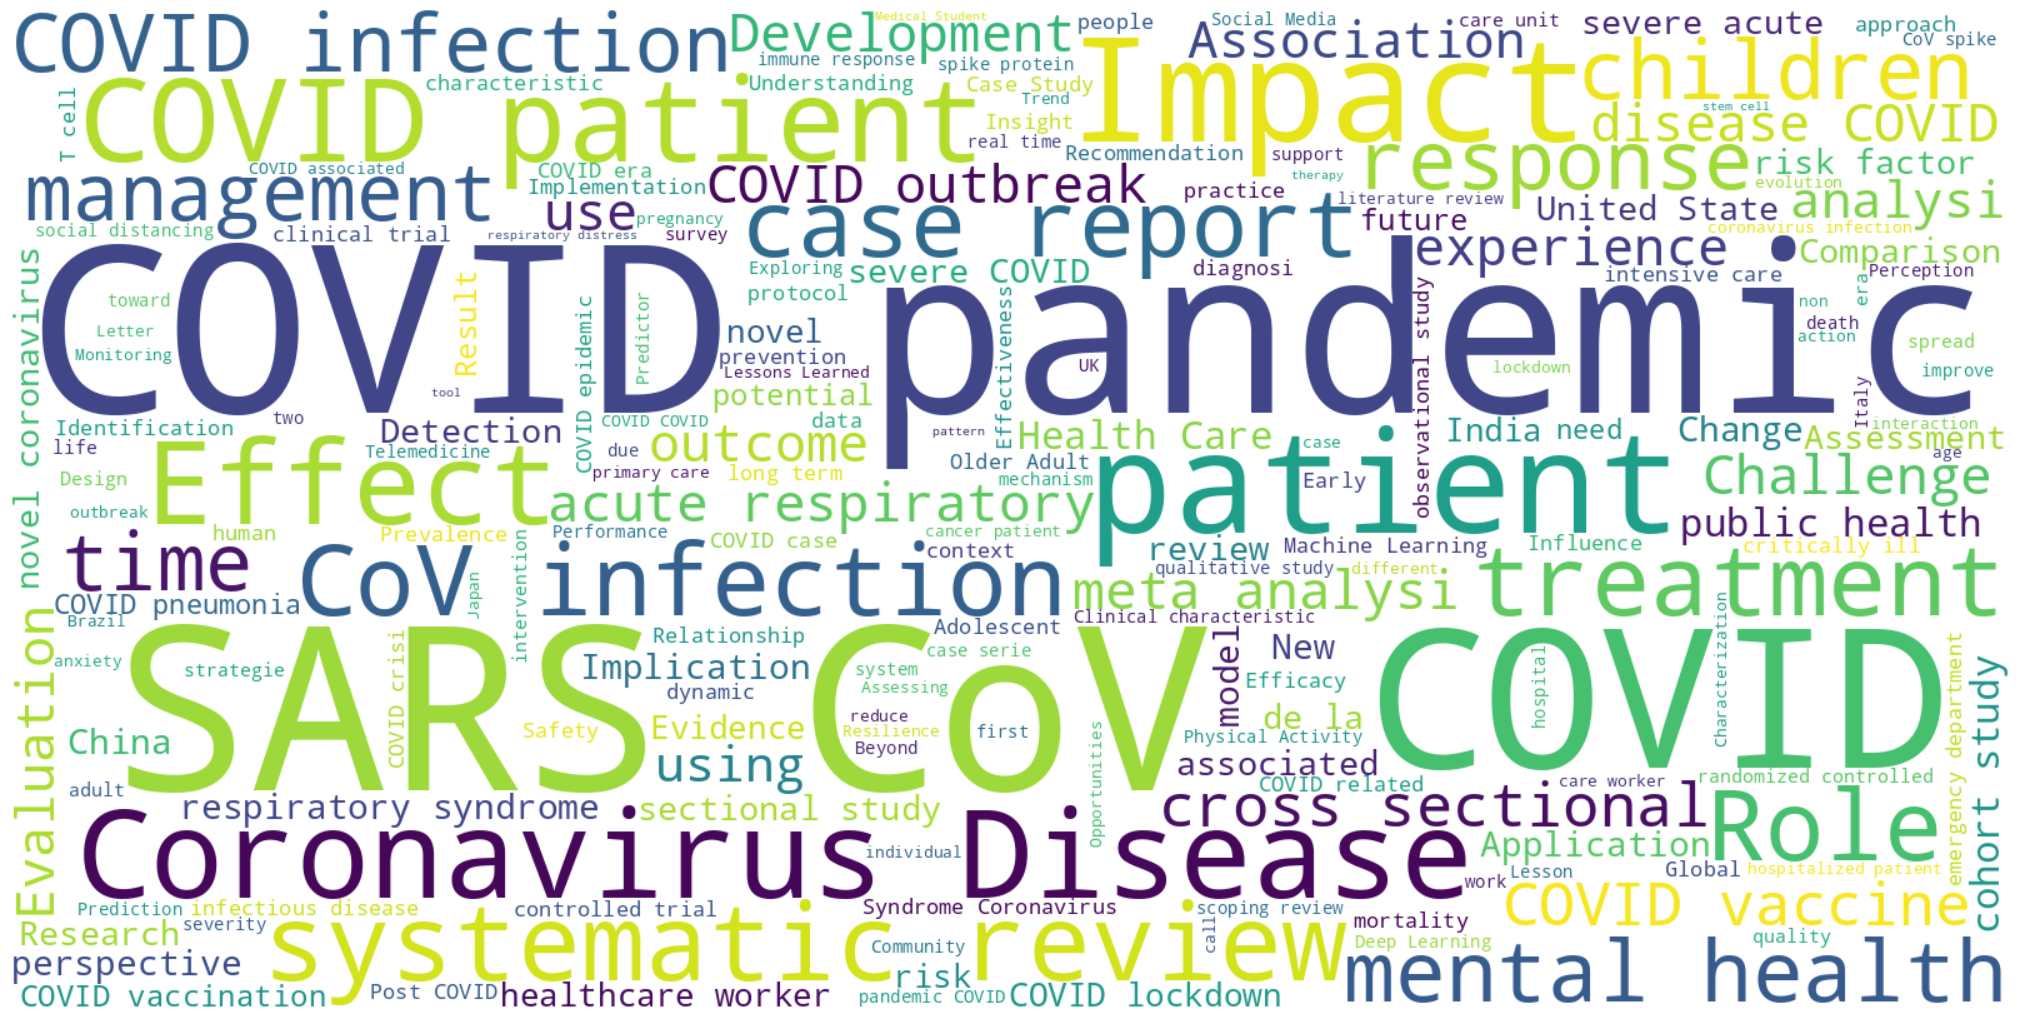

In [23]:
from wordcloud import WordCloud, STOPWORDS


# 1. Préparation du texte
# On prend la colonne 'title', on s'assure que c'est du texte (str),
# et on joint toutes les lignes en une seule grande phrase.
text_titles = " ".join(title for title in df['title'].dropna().astype(str))

# 2. Configuration du Nuage de Mots
# - width/height : pour une bonne résolution
# - background_color : blanc pour être propre
# - stopwords : pour retirer les mots courants (the, a, an...)
# - colormap : le jeu de couleurs (ex: 'viridis', 'plasma', 'inferno', 'magma')
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    stopwords=STOPWORDS,
    colormap='viridis',
    min_font_size=10
).generate(text_titles)

# 3. Affichage et Sauvegarde
plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") # Retire les axes X et Y (les chiffres sur les côtés)
plt.tight_layout(pad=0)

# Enregistrement de l'image
plt.savefig('wordcloud_titles.png', dpi=300, bbox_inches='tight')
print("Image sauvegardée sous : wordcloud_titles.png")

plt.show()